<a href="https://colab.research.google.com/github/maxigaarp/Gestion-de-datos-2022/blob/main/Taller_4_Gesti%C3%B3n_de_datos_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(stringr)
install.packages("RSQLite")
library(RSQLite)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plogr’




# Vectorizacion

Hay operaciones que, si las aplicamos a un vector, son aplicadas a todos sus elementos.



In [ ]:
mi_vector <- 1:10

mi_vector

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
mi_vector *5


[1] 5
[1] 10
[1] 15
[1] 20
[1] 25
[1] 30
[1] 35
[1] 40
[1] 45
[1] 50


Esto es mucho mas facil y rapido que a aplicar el exponente a cada elemento del vector. 

Como todo lo que ocurre en R es una función, podemos decir que al vectorizar estamos aplicando una función a cada elemento de un vector. La familia de funciones apply nos permite implementar esto en estructuras de datos distintas a los vectores.

## Funciones


Recordemos que en R podemos definir funciones, es decir
area_cuad <- function(lado1, lado2) {
  lado1 * lado2
}

In [ ]:
es_primo <-function(numero){
  if(numero<2){
    return(FALSE)
  }
  if(numero == 2){
    return(TRUE)
  }
  for(i in 2:(numero-1)){
    if(numero%%i == 0){
      return(FALSE)
    }
  }
  return(TRUE)
}

print(es_primo(123121))
print(es_primo(123121231))

[1] TRUE
[1] FALSE


In [ ]:
es_primo(2)

[1] TRUE

Sin embargo, si queremos aplicar esta función a un vector o serie de elementos, empezamos a observar problemas

In [ ]:
print(es_primo(mi_vector))

ERROR: ignored

In [ ]:
for(c in mi_vector){
  print(es_primo(c))
}

[1] FALSE
[1] TRUE
[1] TRUE
[1] FALSE
[1] TRUE
[1] FALSE
[1] TRUE
[1] FALSE
[1] FALSE
[1] FALSE


El problema de esta solución es adaptarlo a data frames (consumo de memoria) y tiempo de ejecución. 

## Apply
Existen muchas funciones de la familia apply y todas tienen alguna aplicacion especifica, 
 * apply()
 * eapply()
 * lapply()
 * mapply() 
 * rapply()
 * sapply()
 * tapply()
 * vapply()

Como caracteristica general, todas las funciones de esta familia tienen una característica en común: reciben como argumentos a un objeto y al menos una función.

Veremos las principales que son apply y lapply


Apply: es la función central de esta familia, lo que hace es aplicar funciones **vectoriales** sobre matrices (o data frames). 

Esta función se aplica sobre la matriz de la siguiente forma:

apply(MATRIX, MARGIN, FUN)

MATRIX en la que uno quiere aplicar la función, por ejemplo nuestra BBDD

MARGIN es la dimensión en que uno quiere aplicar la función. Si el valor es 1 la función se aplica en cada fila, si el valor es 2, se aplica en cada columna. si el valor es c(1,2) se aplica en cada elemento, mientras que si el valor es c(2,1) se devuelve la matriz transpuesta. En los dos últimos casos se retorna siempre una matriz, no una bbdd.

FUN es la función que uno determina.

Es especialmente importante conocer bien la función y entender que va  a retornar apply.

In [ ]:
apply(mi_vector, MARGIN = 1, FUN = es_primo)

ERROR: ignored

In [ ]:
mi_matriz = matrix(mi_vector, nrow = 2)
mi_matriz

1,3,5,7,9
2,4,6,8,10


In [ ]:
mi_matriz = matrix(mi_vector, nrow = 2)
mi_matriz
apply(mi_matriz, MARGIN = 2, FUN = es_primo)

1,3,5,7,9
2,4,6,8,10


ERROR: ignored

In [ ]:
mi_matriz = matrix(mi_vector, nrow = 2)
mi_matriz
apply(mi_matriz, MARGIN = 2, FUN = sum)

1,3,5,7,9
2,4,6,8,10


[1]  3  7 11 15 19

In [ ]:
mi_matriz = matrix(mi_vector, nrow = 2)
mi_matriz
apply(mi_matriz, MARGIN = c(1,2), FUN = es_primo)

1,3,5,7,9
2,4,6,8,10


FALSE,TRUE,TRUE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE


In [ ]:
mi_matriz = matrix(mi_vector, nrow = 2)
mi_matriz
apply(mi_matriz, MARGIN = c(2,1), FUN = es_primo)

1,3,5,7,9
2,4,6,8,10


FALSE,TRUE
TRUE,FALSE
TRUE,FALSE
TRUE,FALSE
FALSE,FALSE


Por otra parte, lapply es un caso especial de apply, diseñado para aplicar funciones a todos los elementos de una lista, retornando una lista.

lapply(LIST, FUN)

LIST es la lista que entregamos

FUN es nuestra función

Siempre retorna una lista



In [ ]:
lapply(mi_vector, es_primo)

[[1]]
[1] FALSE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] FALSE

[[5]]
[1] TRUE

[[6]]
[1] FALSE

[[7]]
[1] TRUE

[[8]]
[1] FALSE

[[9]]
[1] FALSE

[[10]]
[1] FALSE

Uno puede crear funciones sabiendo con que tipo de elementos va a trabajar, y apply() permite resolver los problemas de forma muy eficiente.

In [ ]:
suma_es_primo <-function(x){
  numero <- sum(x)
  if(numero<2){
    return(FALSE)
  }
  if(numero == 2){
    return(TRUE)
  }
  for(i in 2:(numero-1)){
    if(numero%%i == 0){
      return(FALSE)
    }
  }
  return(TRUE)
}


In [ ]:
mi_matriz = matrix(mi_vector, nrow = 5)
mi_matriz
apply(mi_matriz,MARGIN = 1, FUN = suma_es_primo)

1,6
2,7
3,8
4,9
5,10


[1]  TRUE FALSE  TRUE  TRUE FALSE

In [ ]:
promediopond <- function(x){
  n1 <- x[1]
  n2 <- x[2]
  promedio <- 0.7*n1 +0.3*n2
  return(promedio)
}

In [ ]:
mi_df = data.frame(matrix(mi_vector, nrow = 5))
mi_df


X1,X2
<int>,<int>
1,6
2,7
3,8
4,9
5,10


In [ ]:
mi_df["X3"] = apply(mi_matriz,MARGIN = 1, FUN = promediopond)

mi_df

X1,X2,X3
<int>,<int>,<dbl>
1,6,2.5
2,7,3.5
3,8,4.5
4,9,5.5
5,10,6.5


# Ajustar Base de datos

Ir a https://www.cr2.cl/datos-de-precipitacion/?cp_Precipitacion=2

Descargar datos del 2019

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [ ]:
unzip("/content/cr2_prAmon_2019.zip")

In [ ]:
x <- read.csv("/content/cr2_prAmon_2019/cr2_prAmon_2019.txt", na = "-9999", header =F)


In [ ]:
x

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V871,V872,V873,V874,V875,V876,V877,V878,V879,V880
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
codigo_estacion,1000005,1200002,1200003,1201005,1201010,1201003,1001005,1110001,1202009,⋯,330021,330019,330031,330030,370033,420004,430002,430004,510005,530005
institucion,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,⋯,DMC,DMC,DMC,DMC,DMC,DMC,DMC,DMC,DMC,DMC
fuente,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,⋯,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web
nombre,Visviri,Villa Industrial (Tacora),Humapalca,Rio Caracarani En Humapalca,Alcerreca,Rio Lluta En Alcerreca,Caquena,Puquios,Pacollo,⋯,Pudahuel Santiago,Eulogio Sanchez Tobalaba Ad.,Juan Fernandez Estacion Meteorologica,Santo Domingo Ad.,Maria Dolores Los Angeles Ad.,Chaiten Ad.,Futaleufu Ad.,Alto Palenaad.,Teniente Gallardo Puerto Natales Ad.,Fuentes Martinez Porvenir Ad.
altura,4080,4080,3980,3908,3990,3550,4400,3750,4185,⋯,482,650,35,75,120,10,347,281,69,27
latitud,-17.595,-17.7719,-17.835,-17.8428,-17.9931,-18.0036,-18.0542,-18.1747,-18.1769,⋯,-33.3919,-33.4544,-33.6367,-33.655,-37.4028,-42.9303,-43.1889,-43.6117,-51.6672,-53.1875
longitud,-69.4831,-69.7244,-69.7039,-69.6994,-69.6594,-69.6331,-69.2017,-69.7439,-69.5092,⋯,-70.7944,-70.5478,-78.835,-71.6142,-72.4225,-72.7008,-71.8525,-71.8053,-72.5289,-70.3203
codigo_cuenca,10,12,12,12,12,12,10,11,12,⋯,57,57,50,50,81,104,104,104,122,128
nombre_cuenca,Altiplanicas,Rio Lluta,Rio Lluta,Rio Lluta,Rio Lluta,Rio Lluta,Altiplanicas,Quebrada De La Concordia,Rio Lluta,⋯,Rio Maipo,Rio Maipo,Costeras Quilimari-Petorca,Costeras Quilimari-Petorca,Rio Itata,Cuencas E Islas Entre R.Bueno Y R. Puelo,Cuencas E Islas Entre R.Bueno Y R. Puelo,Cuencas E Islas Entre R.Bueno Y R. Puelo,Costeras Entre Seno Andrew Y R. Hollemberg E Islas Al Oriente,Tierra Del Fuego


In [ ]:
setNames(as.data.frame(t(x[,-1])),as.character(x[,1]))

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,⋯,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
V2,1000005,DGA,dga_web,Visviri,4080,-17.595,-69.4831,10,Altiplanicas,100,⋯,18.8,2.6,6.2,1.2,1.8,0,11.8,14.6,12.8,30.6
V3,1200002,DGA,dga_web,Villa Industrial (Tacora),4080,-17.7719,-69.7244,12,Rio Lluta,120,⋯,13,0.6,2.2,0.4,0.2,0.6,1.4,3.6,2.8,NA
V4,1200003,DGA,dga_web,Humapalca,3980,-17.835,-69.7039,12,Rio Lluta,120,⋯,62,0,0,0,2,0,0,2,11,NA
V5,1201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12,Rio Lluta,120,⋯,11.8,0.7,8.9,0,0.1,0,0.2,0,5.7,15.2
V6,1201010,DGA,dga_web,Alcerreca,3990,-17.9931,-69.6594,12,Rio Lluta,120,⋯,0,0.3,0.2,0,0.6,0.2,0,0,0,NA
V7,1201003,DGA,dga_web,Rio Lluta En Alcerreca,3550,-18.0036,-69.6331,12,Rio Lluta,120,⋯,9.3,0.3,0.5,0,0.3,0,0,0,0.5,0.9
V8,1001005,DGA,dga_web,Caquena,4400,-18.0542,-69.2017,10,Altiplanicas,100,⋯,26.6,4.8,1.8,0.4,0.2,0,2.6,6.2,8.0,11.2
V9,1110001,DGA,dga_web,Puquios,3750,-18.1747,-69.7439,11,Quebrada De La Concordia,111,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
V10,1202009,DGA,dga_web,Pacollo,4185,-18.1769,-69.5092,12,Rio Lluta,120,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
y <- setNames(as.data.frame(t(x[,-1])),as.character(x[,1]))

y[,1:20]

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones,inicio_automatica,1900-01,1900-02,1900-03,1900-04,1900-05
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
V2,1000005,DGA,dga_web,Visviri,4080,-17.595,-69.4831,10,Altiplanicas,100,Entre Limite Peru-Bolivia Y Rio Lauca,1968-05-01,2019-12-31,18167,2017-08-02,NA,NA,NA,NA,NA
V3,1200002,DGA,dga_web,Villa Industrial (Tacora),4080,-17.7719,-69.7244,12,Rio Lluta,120,Rio Lluta Alto,1975-01-01,2019-11-30,15794,-,NA,NA,NA,NA,NA
V4,1200003,DGA,dga_web,Humapalca,3980,-17.835,-69.7039,12,Rio Lluta,120,Rio Lluta Alto,1971-12-01,2019-11-30,17393,-,NA,NA,NA,NA,NA
V5,1201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12,Rio Lluta,120,Rio Lluta Alto,2013-06-01,2019-12-31,2185,2017-04-04,NA,NA,NA,NA,NA
V6,1201010,DGA,dga_web,Alcerreca,3990,-17.9931,-69.6594,12,Rio Lluta,120,Rio Lluta Alto,1971-01-01,2019-11-30,17563,-,NA,NA,NA,NA,NA
V7,1201003,DGA,dga_web,Rio Lluta En Alcerreca,3550,-18.0036,-69.6331,12,Rio Lluta,120,Rio Lluta Alto,2001-12-01,2019-12-31,6277,2017-09-15,NA,NA,NA,NA,NA
V8,1001005,DGA,dga_web,Caquena,4400,-18.0542,-69.2017,10,Altiplanicas,100,Entre Limite Peru-Bolivia Y Rio Lauca,1970-01-01,2019-12-30,16160,-,NA,NA,NA,NA,NA
V9,1110001,DGA,dga_web,Puquios,3750,-18.1747,-69.7439,11,Quebrada De La Concordia,111,Quebrada De La Concordia,1975-05-01,1981-05-31,2105,-,NA,NA,NA,NA,NA
V10,1202009,DGA,dga_web,Pacollo,4185,-18.1769,-69.5092,12,Rio Lluta,120,Rio Lluta Alto,1978-11-01,1999-05-31,7395,-,NA,NA,NA,NA,NA


In [ ]:
y

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,⋯,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
V2,1000005,DGA,dga_web,Visviri,4080,-17.595,-69.4831,10,Altiplanicas,100,⋯,18.8,2.6,6.2,1.2,1.8,0,11.8,14.6,12.8,30.6
V3,1200002,DGA,dga_web,Villa Industrial (Tacora),4080,-17.7719,-69.7244,12,Rio Lluta,120,⋯,13,0.6,2.2,0.4,0.2,0.6,1.4,3.6,2.8,NA
V4,1200003,DGA,dga_web,Humapalca,3980,-17.835,-69.7039,12,Rio Lluta,120,⋯,62,0,0,0,2,0,0,2,11,NA
V5,1201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12,Rio Lluta,120,⋯,11.8,0.7,8.9,0,0.1,0,0.2,0,5.7,15.2
V6,1201010,DGA,dga_web,Alcerreca,3990,-17.9931,-69.6594,12,Rio Lluta,120,⋯,0,0.3,0.2,0,0.6,0.2,0,0,0,NA
V7,1201003,DGA,dga_web,Rio Lluta En Alcerreca,3550,-18.0036,-69.6331,12,Rio Lluta,120,⋯,9.3,0.3,0.5,0,0.3,0,0,0,0.5,0.9
V8,1001005,DGA,dga_web,Caquena,4400,-18.0542,-69.2017,10,Altiplanicas,100,⋯,26.6,4.8,1.8,0.4,0.2,0,2.6,6.2,8.0,11.2
V9,1110001,DGA,dga_web,Puquios,3750,-18.1747,-69.7439,11,Quebrada De La Concordia,111,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
V10,1202009,DGA,dga_web,Pacollo,4185,-18.1769,-69.5092,12,Rio Lluta,120,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
y10 <- y %>% select(c(1,6,7,tail(names(y), 12*10)))
y10


,codigo_estacion,latitud,longitud,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,⋯,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
V2,1000005,-17.595,-69.4831,38.3,16,5,2,0,0,0,⋯,18.8,2.6,6.2,1.2,1.8,0,11.8,14.6,12.8,30.6
V3,1200002,-17.7719,-69.7244,5,14,4,0,0,0,0,⋯,13,0.6,2.2,0.4,0.2,0.6,1.4,3.6,2.8,NA
V4,1200003,-17.835,-69.7039,0,58,15,5,1,0,0,⋯,62,0,0,0,2,0,0,2,11,NA
V5,1201005,-17.8428,-69.6994,NA,NA,NA,NA,NA,NA,NA,⋯,11.8,0.7,8.9,0,0.1,0,0.2,0,5.7,15.2
V6,1201010,-17.9931,-69.6594,25,8,0,0,0,0,0,⋯,0,0.3,0.2,0,0.6,0.2,0,0,0,NA
V7,1201003,-18.0036,-69.6331,13.1,18.7,1.8,0.5,2.1,0,0,⋯,9.3,0.3,0.5,0,0.3,0,0,0,0.5,0.9
V8,1001005,-18.0542,-69.2017,94.2,93.9,74.1,7.8,0,0,0,⋯,26.6,4.8,1.8,0.4,0.2,0,2.6,6.2,8.0,11.2
V9,1110001,-18.1747,-69.7439,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
V10,1202009,-18.1769,-69.5092,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


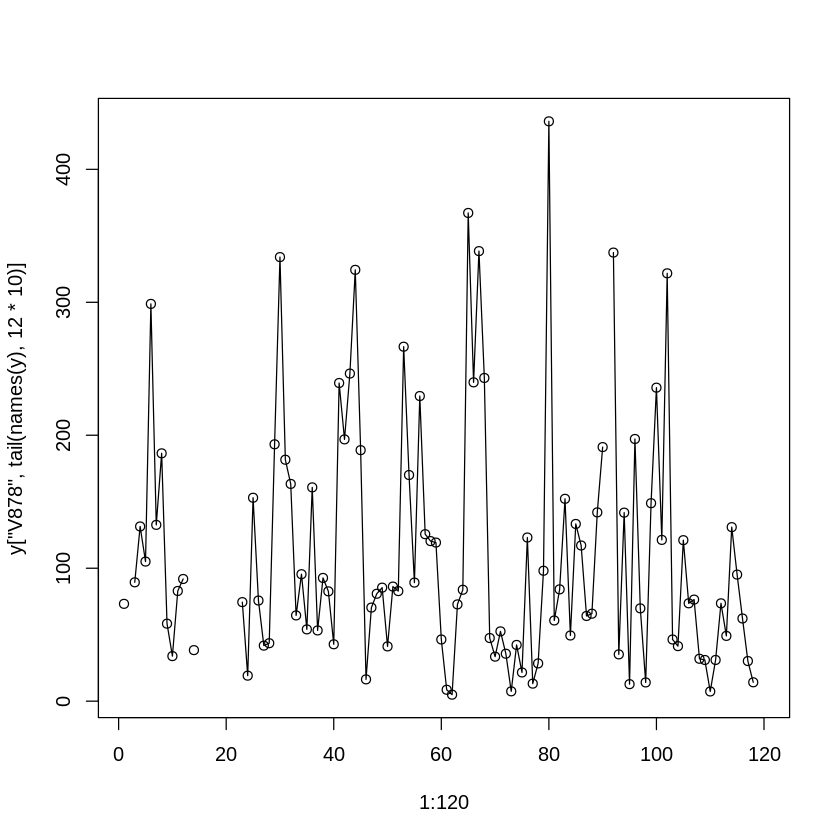

In [ ]:
plot(1:120,y["V878",tail(names(y), 12*10)])
lines(1:120,y["V878",tail(names(y), 12*10)])

In [ ]:
y10 %>%
  mutate(count = rowSums(is.na(y10)))%>%
  filter(count<5)


,codigo_estacion,latitud,longitud,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,⋯,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
V2,1000005,-17.595,-69.4831,38.3,16,5,2,0,0,0,⋯,2.6,6.2,1.2,1.8,0,11.8,14.6,12.8,30.6,1
V3,1200002,-17.7719,-69.7244,5,14,4,0,0,0,0,⋯,0.6,2.2,0.4,0.2,0.6,1.4,3.6,2.8,NA,4
V4,1200003,-17.835,-69.7039,0,58,15,5,1,0,0,⋯,0,0,0,2,0,0,2,11,NA,2
V6,1201010,-17.9931,-69.6594,25,8,0,0,0,0,0,⋯,0.3,0.2,0,0.6,0.2,0,0,0,NA,4
V7,1201003,-18.0036,-69.6331,13.1,18.7,1.8,0.5,2.1,0,0,⋯,0.3,0.5,0,0.3,0,0,0,0.5,0.9,1
V14,1202012,-18.195,-69.5589,5.8,9.8,0.6,0.3,3.6,0,0,⋯,0,2.4,0,7.2,0,0,0,0,2.8,3
V17,1020017,-18.2042,-69.2683,42.5,45,25.5,10,2.5,0,0,⋯,1.6,1.4,0,0.3,0,0.9,5.1,19.4,4.5,2
V19,1020016,-18.2164,-69.2956,79,76,15,0,0,0,0,⋯,0.2,1.2,0,1.2,0,6.6,4.3,8.8,23.8,4
V23,1010007,-18.2808,-69.1383,76,82,18,0,0,0,0,⋯,1.6,1,0,0,0,13,3.3,13.1,NA,2


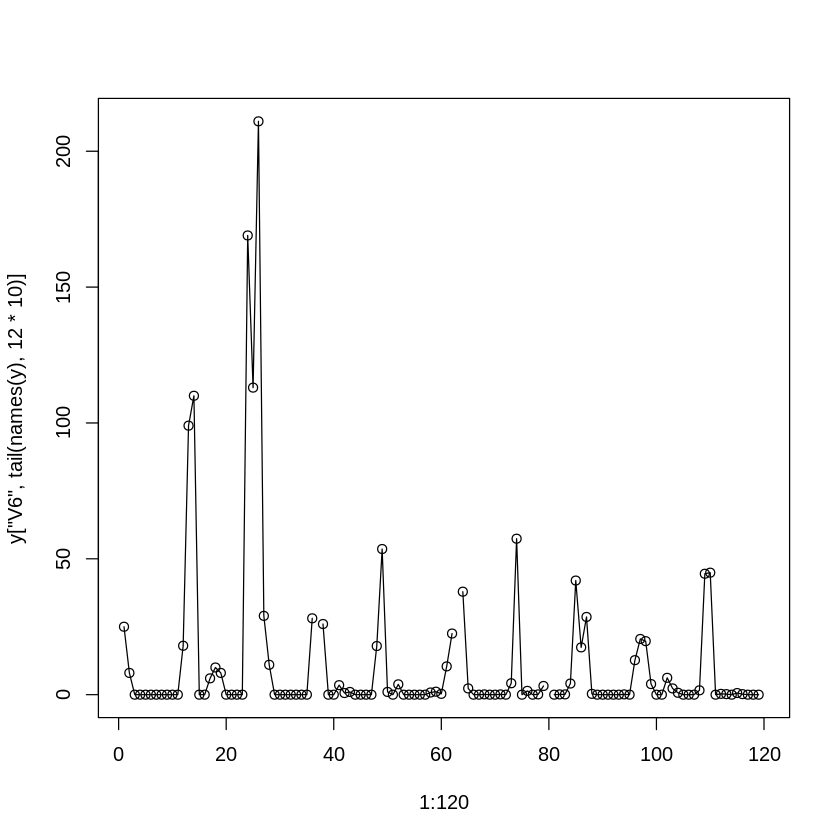

In [ ]:
plot(1:120,y["V6",tail(names(y), 12*10)])
lines(1:120,y["V6",tail(names(y), 12*10)])

In [ ]:
y10

,codigo_estacion,latitud,longitud,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,⋯,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
V2,1000005,-17.595,-69.4831,38.3,16,5,2,0,0,0,⋯,18.8,2.6,6.2,1.2,1.8,0,11.8,14.6,12.8,30.6
V3,1200002,-17.7719,-69.7244,5,14,4,0,0,0,0,⋯,13,0.6,2.2,0.4,0.2,0.6,1.4,3.6,2.8,NA
V4,1200003,-17.835,-69.7039,0,58,15,5,1,0,0,⋯,62,0,0,0,2,0,0,2,11,NA
V5,1201005,-17.8428,-69.6994,NA,NA,NA,NA,NA,NA,NA,⋯,11.8,0.7,8.9,0,0.1,0,0.2,0,5.7,15.2
V6,1201010,-17.9931,-69.6594,25,8,0,0,0,0,0,⋯,0,0.3,0.2,0,0.6,0.2,0,0,0,NA
V7,1201003,-18.0036,-69.6331,13.1,18.7,1.8,0.5,2.1,0,0,⋯,9.3,0.3,0.5,0,0.3,0,0,0,0.5,0.9
V8,1001005,-18.0542,-69.2017,94.2,93.9,74.1,7.8,0,0,0,⋯,26.6,4.8,1.8,0.4,0.2,0,2.6,6.2,8.0,11.2
V9,1110001,-18.1747,-69.7439,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
V10,1202009,-18.1769,-69.5092,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
data.frame(apply(y10, 2, function(x) as.numeric(as.character(x))))

codigo_estacion,latitud,longitud,X2010.01,X2010.02,X2010.03,X2010.04,X2010.05,X2010.06,X2010.07,⋯,X2019.03,X2019.04,X2019.05,X2019.06,X2019.07,X2019.08,X2019.09,X2019.10,X2019.11,X2019.12
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000005,-17.5950,-69.4831,38.3,16.0,5.0,2.0,0.0,0,0,⋯,18.8,2.6,6.2,1.2,1.8,0.0,11.8,14.6,12.8,30.6
1200002,-17.7719,-69.7244,5.0,14.0,4.0,0.0,0.0,0,0,⋯,13.0,0.6,2.2,0.4,0.2,0.6,1.4,3.6,2.8,NA
1200003,-17.8350,-69.7039,0.0,58.0,15.0,5.0,1.0,0,0,⋯,62.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,11.0,NA
1201005,-17.8428,-69.6994,NA,NA,NA,NA,NA,NA,NA,⋯,11.8,0.7,8.9,0.0,0.1,0.0,0.2,0.0,5.7,15.2
1201010,-17.9931,-69.6594,25.0,8.0,0.0,0.0,0.0,0,0,⋯,0.0,0.3,0.2,0.0,0.6,0.2,0.0,0.0,0.0,NA
1201003,-18.0036,-69.6331,13.1,18.7,1.8,0.5,2.1,0,0,⋯,9.3,0.3,0.5,0.0,0.3,0.0,0.0,0.0,0.5,0.9
1001005,-18.0542,-69.2017,94.2,93.9,74.1,7.8,0.0,0,0,⋯,26.6,4.8,1.8,0.4,0.2,0.0,2.6,6.2,8.0,11.2
1110001,-18.1747,-69.7439,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1202009,-18.1769,-69.5092,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
y10_pivot <- data.frame(apply(y10, 2, function(x) as.numeric(as.character(x)))) %>%
        pivot_longer(cols = X2010.01:X2019.12,
        names_to = c("Año", "Mes"),
        names_pattern = "X(....).(..)")

y10_pivot

codigo_estacion,latitud,longitud,Año,Mes,value
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1000005,-17.595,-69.4831,2010,01,38.3
1000005,-17.595,-69.4831,2010,02,16.0
1000005,-17.595,-69.4831,2010,03,5.0
1000005,-17.595,-69.4831,2010,04,2.0
1000005,-17.595,-69.4831,2010,05,0.0
1000005,-17.595,-69.4831,2010,06,0.0
1000005,-17.595,-69.4831,2010,07,0.0
1000005,-17.595,-69.4831,2010,08,0.0
1000005,-17.595,-69.4831,2010,09,0.0


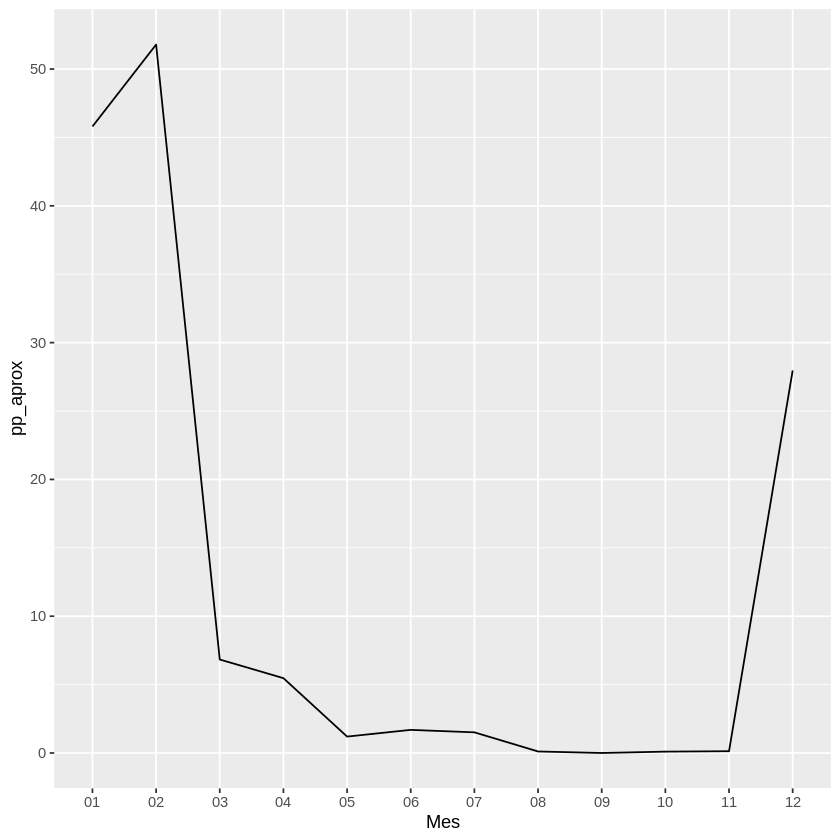

In [ ]:
y10_pivot %>% filter(codigo_estacion==1201010)%>%
              group_by(Mes)%>%
              summarise(pp_aprox=mean(value, na.rm=T))%>%
              ggplot() + geom_line(aes(x=Mes, y=pp_aprox, group = 1))



Actividad:

 * Elija una posicion geografica que sea de su interes (para eso vaya a google maps busque un lugar y luego le extrae la latitud y longitud). Busque la estación más cercanas a ese punto y calcule el promedio de lluvia mensual en ese punto.

In [ ]:
Distancia <- function(x){
  La1 <- -50.94266419154929
  Lo1 <- -73.40739944593683
  La2 <- as.numeric(x["latitud"])
  Lo2 <- as.numeric(x["longitud"])

  d<-((La1-La2)^2 + (Lo1-Lo2)^2)^0.5
  return(d)
}


In [ ]:
Distancia()

In [ ]:
y10_pivot["distancia"] = apply(y10_pivot,MARGIN = 1, FUN = Distancia)

In [ ]:
y10_pivot

codigo_estacion,latitud,longitud,Año,Mes,value,distancia
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1000005,-17.595,-69.4831,2010,01,38.3,33.57777
1000005,-17.595,-69.4831,2010,02,16.0,33.57777
1000005,-17.595,-69.4831,2010,03,5.0,33.57777
1000005,-17.595,-69.4831,2010,04,2.0,33.57777
1000005,-17.595,-69.4831,2010,05,0.0,33.57777
1000005,-17.595,-69.4831,2010,06,0.0,33.57777
1000005,-17.595,-69.4831,2010,07,0.0,33.57777
1000005,-17.595,-69.4831,2010,08,0.0,33.57777
1000005,-17.595,-69.4831,2010,09,0.0,33.57777


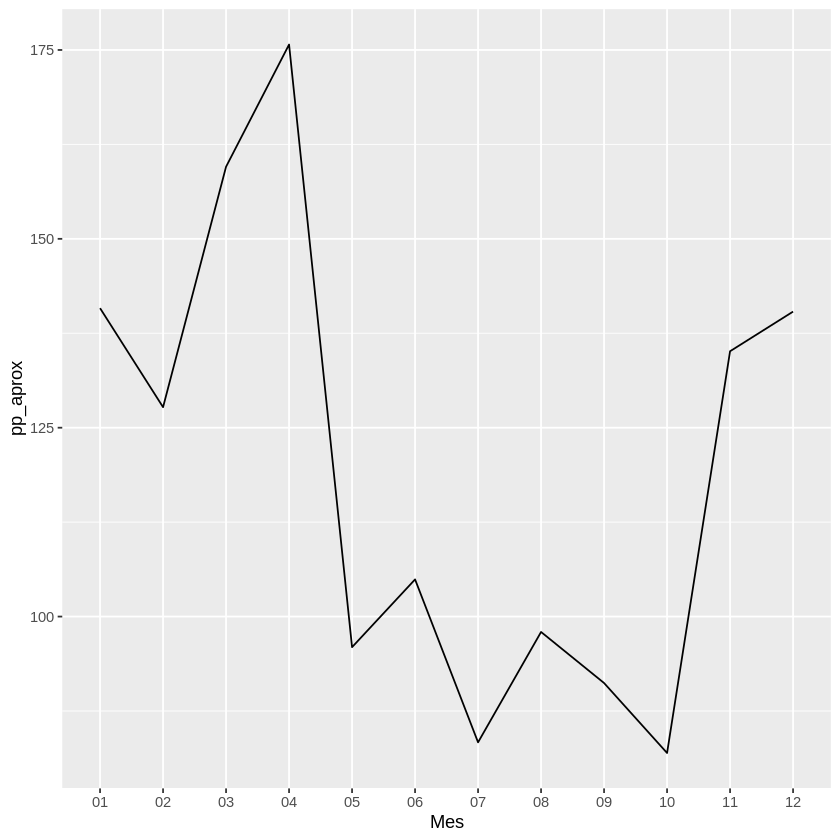

In [ ]:
y10_pivot %>% filter(distancia == min(distancia))%>%
              group_by(Mes)%>%
              summarise(pp_aprox=mean(value, na.rm=T))%>%
              ggplot() + geom_line(aes(x=Mes, y=pp_aprox, group = 1))



# Cargar datos a SQL

In [ ]:
system("gdown --id 1-q1ydcu6afA3LQ9uxlh9J9B9kvEJvrRs")
unzip("/content/DatosProyecto.zip")

In [ ]:
conn <- dbConnect(RSQLite::SQLite(), "mineduc.db")

In [ ]:
lista <- list.files("/content/content/drive/MyDrive/Gestion de Datos/Datos Proyecto/Datos asistencia")
directorio <- "/content/content/drive/MyDrive/Gestion de Datos/Datos Proyecto/Datos asistencia/"

for (name in lista){
  if (str_detect(name, ".rar")){
    foldername<-substr(name, 1, nchar(name)-4)
    system(paste("mkdir 'Asistencia/",foldername,"'",sep=""))
    system(paste("unrar x '",directorio,name,"' 'Asistencia/",substr(name, 1, nchar(name)-4),"/'", sep=""),intern = T)
  }
  else {
    unzip(paste(directorio,name,sep=""), exdir="Asistencia")
  }
}


In [ ]:
lista_de_csvs <- list.files("Asistencia",pattern = ".(CSV|csv)$", recursive = TRUE)

In [ ]:
lista_de_csvs

[1] "20190514_Asistencia_Marzo_2019_20190415_PUBL.csv"                                          
 [2] "20190812_Asistencia_Abril_2019_20190515_PUBL.csv"                                          
 [3] "20191211_Asistencia_Julio_2019_20190715_PUBL.csv"                                          
 [4] "20191211_Asistencia_Junio_2019_20190715_PUBL.csv"                                          
 [5] "20191227_Asistencia_Agosto_2019_20190915_PUBL.csv"                                         
 [6] "20191511_Asistencia_Mayo_2019_20190615_PUBL.csv"                                           
 [7] "20200102_Asistencia_Septiembre_2019_20191015_PUBL.csv"                                     
 [8] "20200106_Asistencia_Octubre_2019_20191115_PUBL.csv"                                        
 [9] "20200108_Asistencia_noviembre_2019_20191215_PUBL.csv"                                      
[10] "20200120_Asistencia_diciembre_2019_20200115_PUBL.csv"                                      
[11] "Asistecia Declarada Noviembre 2017/20171220_Asistencia_Noviembre_2017_20171215_PUBL.csv"   
[12] "Asistencia decalarada diciembre 2016/20170207_Asistencia_Diciembre_2016_20170115_PUBL.csv" 
[13] "Asistencia Declarada abril 2015/20150529_Asistencia_abril_2015_20150522_PUBL.CSV"          
[14] "Asistencia Declarada Abril 2016/20160606_Asistencia_Abril_2016_20160515_PUBL.csv"          
[15] "Asistencia Declarada Abril 2017/20170608_Asistencia_Abril_2017_20170515_PUBL.csv"          
[16] "Asistencia Declarada Abril 2018/20180830_Asistencia_Abril_2018_20180515_PUBL.csv"          
[17] "Asistencia Declarada agosto 2015/20150924_Asistencia_agosto_2015_20150921_PUBL.CSV"        
[18] "Asistencia declarada agosto 2016/20161006_Asistencia_Agosto_2016_20160915_PUBL.csv"        
[19] "Asistencia Declarada Agosto 2017/20171003_Asistencia_Agosto_2017_20170915_PUBL.csv"        
[20] "Asistencia Declarada Agosto 2018/20181026_Asistencia_Agosto_2018_20180915_PUBL.csv"        
[21] "Asistencia declarada diciembre 2015/20160122_Asistencia_Diciembre_2015_20160115_PUBL.CSV"  
[22] "Asistencia Declarada Diciembre 2017/20180131_Asistencia_Diciembre_2017_20180115_PUBL.csv"  
[23] "Asistencia Declarada Diciembre 2018/20190121_Asistencia_Diciembre_2018_20190115_PUBL.csv"  
[24] "Asistencia Declarada julio 2015/20150827_Asistencia_julio_2015_20150818_PUBL.CSV"          
[25] "Asistencia Declarada Julio 2016/20160901_Asistencia_Julio_2016_20160815_PUBL.csv"          
[26] "Asistencia Declarada Julio 2017/20170829_Asistencia_Julio_2017_20170815_PUBL.csv"          
[27] "Asistencia Declarada Julio 2018/20180904_Asistencia_Julio_2018_20180815_PUBL.csv"          
[28] "Asistencia Declarada junio 2015/20150710_Asistencia_junio_2015_20150709_PUBL.CSV"          
[29] "Asistencia Declarada Junio 2016/20160809_Asistencia_Junio_2016_20160715_PUBL.csv"          
[30] "Asistencia Declarada Junio 2017/20170823_Asistencia_Junio_2017_20170715_PUBL.csv"          
[31] "Asistencia Declarada Junio 2018/20180816_Asistencia_Junio_2018_20180715_PUBL.csv"          
[32] "Asistencia Declarada marzo 2015/20150421_Asistencia_marzo_2015_20140420_PUBL.CSV"          
[33] "Asistencia Declarada Marzo 2016/20160505_Asistencia_Marzo_2016_20160415_PUBL.csv"          
[34] "Asistencia Declarada Marzo 2017/20170509_Asistencia_Marzo_2017_20170415_PUBL.csv"          
[35] "Asistencia Declarada Marzo 2018/20180816_Asistencia_Marzo_2018_20180415_PUBL.csv"          
[36] "Asistencia Declarada mayo 2015/20150630_Asistencia_mayo_2015_20150622_PUBL.CSV"            
[37] "Asistencia Declarada Mayo 2016/20160623_Asistencia_Mayo_2016_20160615_PUBL.CSV"            
[38] "Asistencia Declarada Mayo 2017/20170712_Asistencia_Mayo_2017_20170615_PUBL.csv"            
[39] "Asistencia Declarada Mayo 2018/20180720_Asistencia_Mayo_2018_20180615_PUBL.csv"            
[40] "Asistencia Declarada noviembre 2015/20151222_Asistencia_Noviembre_2015_20151217_PUBL.CSV"  
[41] "Asistencia declarada noviembre 2016/20161223_Asistencia_Noviembre_2016_2016

In [ ]:
aux1 <- NULL
cont <- 1
cod_ense1_ense2 <- fread(paste0("/content/Asistencia/",lista_de_csvs[1]))%>% select(COD_ENSE,COD_ENSE2)%>% unique

In [ ]:
cod_ense1_ense2

COD_ENSE,COD_ENSE2
<int>,<int>
463,8
510,7
563,8
610,7
663,8
863,8
10,1
165,3
167,3


In [ ]:
grepl("_2015_",i)


In [ ]:

for (i in lista_de_csvs) {
  if (grepl("_2015_",i)){
 aux1 =
fread(paste0("/content/Asistencia/",i)) %>%
left_join(cod_ense1_ense2, by = "COD_ENSE") %>%
select(AGNO, MES_ESCOLAR, RBD, RURAL_RBD, COD_DEPE, COD_DEPE2, COD_ENSE2, COD_ENSE, COD_GRADO, MRUN,
GEN_ALU, FEC_NAC_ALU, DIAS_ASISTIDOS, DIAS_TRABAJADOS, ASIS_PROMEDIO)%>% mutate(EDAD = AGNO-(FEC_NAC_ALU%/%100))

  apnd=if (i==lista_de_csvs[1]) FALSE else TRUE

  dbWriteTable(conn , name = "Asistencia_MRUN_RBD", 
                  value = aux1,
                  row.names = FALSE, header = !apnd, sep=',',append=apnd,
                  colClasses='character')
                  aux1 = NULL
  }
   if (!grepl("_2015_",i)){
 aux1 =
fread(paste0("/content/Asistencia/",i)) %>%
select(AGNO, MES_ESCOLAR, RBD, RURAL_RBD, COD_DEPE, COD_DEPE2, COD_ENSE2, COD_ENSE, COD_GRADO, MRUN,
GEN_ALU, FEC_NAC_ALU, DIAS_ASISTIDOS, DIAS_TRABAJADOS, ASIS_PROMEDIO)%>% mutate(EDAD = AGNO-(FEC_NAC_ALU%/%100))

apnd=if (i==lista_de_csvs[1]) FALSE else TRUE

  dbWriteTable(conn , name = "Asistencia_MRUN_RBD", 
                  value = aux1,
                  row.names = FALSE, header = !apnd, sep=',',append=apnd,
                  colClasses='character')
                  aux1 = NULL

  }

  print(2)


}

[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2


In [ ]:
dbGetQuery(conn, 'SELECT * FROM Asistencia_MRUN_RBD LIMIT 5')

AGNO,MES_ESCOLAR,RBD,RURAL_RBD,COD_DEPE,COD_DEPE2,COD_ENSE2,COD_ENSE,COD_GRADO,MRUN,GEN_ALU,FEC_NAC_ALU,DIAS_ASISTIDOS,DIAS_TRABAJADOS,ASIS_PROMEDIO,EDAD
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
2019,3,1,0,2,1,8,463,3,2655917,1,199509,0,10,0,24
2019,3,1,0,2,1,8,463,3,3738782,2,196403,8,10,",8",55
2019,3,1,0,2,1,8,463,3,9591749,2,197611,4,10,",4",43
2019,3,1,0,2,1,8,463,3,18244700,2,199507,10,10,1,24
2019,3,1,0,2,1,8,463,3,18524996,2,196502,10,10,1,54


In [ ]:
dbGetQuery(conn, 'SELECT count(MRUN) FROM Asistencia_MRUN_RBD 
                  Group by AGNO')

count(MRUN)
<int>
34997890
34676324
34819652
34910120
35233073
